In [31]:
import numpy as np
import random
import pandas as pd
%matplotlib inline

In [32]:
n_samples = 1200
start_limit = 0.1
end_limit = 56.9
memory_length = 5
step = (end_limit-start_limit)/(n_samples-1)

In [33]:
target = np.linspace(start_limit, end_limit, num=n_samples)
#np.random.shuffle(target)

In [34]:
features = np.zeros((n_samples, memory_length))
for i in range(features.shape[1]):
    features[:,i] = target + ((i+1)*step)

In [35]:
features = 0.6*np.sin(features) + np.sin(1.5*features)
target = 0.6*np.sin(target) + np.sin(1.5*target)

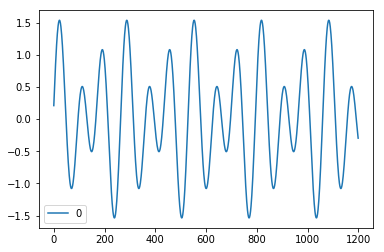

In [36]:
pd.DataFrame(target).plot()

In [37]:
def get_reward(goal, action):
    action = action - 0.5
    # right action
    if goal * action > 0:
        return 1.0
    # wrong action
    else:
        return -1.0

In [38]:
def eval_model(model, features, target):
    preds = model.predict(features)
    decision = np.argmax(preds, axis=1)
    
    goal = np.zeros(target.shape)
    
    goal[features[:,0] < target] = 1
    goal[features[:,0] > target] = 0
    print('goal, decision')
    print(goal, decision)
    
    return f'{(1-np.mean(np.abs(goal-decision)))*100}%', goal, decision

In [39]:
# neuralis halo felepitese
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [40]:
model = Sequential()
model.add(Dense(25, kernel_initializer='lecun_uniform', input_shape=(memory_length,)))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(50, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(25, kernel_initializer='lecun_uniform'))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(2, kernel_initializer='lecun_uniform'))
model.add(Activation('linear')) #linear output so we can have range of real-valued outputs

rms = RMSprop()
model.compile(loss='mse', optimizer=rms)

In [41]:
epochs = 15000
epsilon = 1


In [42]:
for i in range(epochs):
    j = np.random.choice(n_samples, 1)
    x = features[j]

    qval = model.predict(x, batch_size=1)
    if (random.random() < epsilon): #choose random action
        action = np.random.randint(0,2)
    else: #choose best action from Q(s,a) values
        action = (np.argmax(qval))

    # move to next state (there's no)
    # calc next Q values
    # newQ = model.predict(new_state, batch_size=1)
    reward = get_reward(target[j]-features[j,0], action)
    
    y = np.zeros(2)
    y[:] = qval[:]
    # set update value, but it's definitely terminal state
    # so update is this simple
    update = reward
    y[action] = update
    y = y.reshape(1,2)
    model.fit(x, y, batch_size=1, epochs=1, verbose=1)
    
    # reduce epsilon value
    if epsilon > 0.1:
        epsilon -= (1/epochs)*5
    

Epoch 1/1
1/1 [==============================] - 0s 116ms/step - loss: 0.6934
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5901
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2711
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.6770
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4622
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4373
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6281
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5531
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4947
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5121
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7857
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.6108
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5661
Epoch 1/1


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6051
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2548
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4203
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6262
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.5741
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.5080
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4555
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.5114
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3985
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4330
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4027
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1240
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4780
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4751
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0527
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3270
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2020
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6165
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4631
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8288
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1953
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.7681
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0995
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0502
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4323
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3406
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.7638
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4986
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4749
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3870
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.7966
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.5064
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8744
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5162
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2191
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5576
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4035
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4079
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3793
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2233
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4632
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6303
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3860
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2271
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1464
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3949
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2309
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2993
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1664
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4246
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2299
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0480
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0482
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1067
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5786
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0928
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0386
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1966
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0733
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1214
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.0626e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2659
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2096
Epoch 1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5033
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0854
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4632
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3860e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1599
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0847
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0687
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5750e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6460e-04


Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0398
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1217
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0836
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1439
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.8868e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0209
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1558e-05
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.7769
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0769
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0527
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0687
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0141
Epoc

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2341
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.7074
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4151
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.8173e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.3349e-09
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.8577e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1343e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0442
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3887
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0553
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0827
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4257
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5469
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0489
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.1454e-04
Epoch 1/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0535
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3873e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3158
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.5647
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0384
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.2654e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2512
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0389
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1896
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0170
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.4038e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.4479e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0270
Epoch 1/1
1/1 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0238
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0062
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1765e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1070
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.8613e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.1143e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.4596e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.7

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0395
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2643
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4244
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2024
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2081
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0169
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.9512e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4753e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0411
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1665e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.1163e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.5247
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0112
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1809
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3187
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3636
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0933
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0504
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0997
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.5189e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.6694e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0638
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4619e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0239
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0312
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6444e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0466
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0239
Epoch 1/1
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 0.0737
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.7213
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.6777e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0672
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0277
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8629e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4467
Epoch 1/1
1/1 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.6749e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.5098e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1380e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0709
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015


1/1 [==============================] - 0s 2ms/step - loss: 0.5121
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.2285e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.1053e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0490
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2758
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9149e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0673
Epoch 1/1


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0605
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0374
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1572
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.7916e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1213e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6005e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.7189e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2083
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.3321e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.0173e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0257
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.0087e-04


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0295
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1201
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.7069
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.7892e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8798
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.6935e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1101
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2058
Epoc

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0161
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.2544e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1611e-04
Epoch 1/1
1/1 [==============================] - 0s 5ms/step - loss: 0.0241
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.5825e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0202
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0125


Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.9400
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.8387e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1981
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.6326e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.9000e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2519
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0056


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0724e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1289
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0604e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.5065e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1679e

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0771
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.9048
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2254e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1482
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3336e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0137
Epoc

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0283
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.2132e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5855e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4564
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.5067e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8111
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1666


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1551
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2183
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.7033e-06
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1902
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0569
Epoch 1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.6752e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9896e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6399e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.9719e-06
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.2648e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1149e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8895
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0116
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0276
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0055
Epoc

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1390
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0621
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3080
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.8302
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4952e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0327
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4632
Epoch 1/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1141
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0210
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0207
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0581
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.9287
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0676
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1/1
1/

1/1 [==============================] - 0s 2ms/step - loss: 0.3494
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0354e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2724e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0234
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1996
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.1590e-04
Epoch 1/1


Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7470e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0244
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.8164e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.6613e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2257e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.4285e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.1744e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0999
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.6854e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0351
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.6457e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0297
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5534e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.7018e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8484e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.0283e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6980
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1703
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.9991e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0494


Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0112
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1137
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.4244e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.9175e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0080
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1916
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.3133e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 3.1069e

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0322
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2619
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 1/1
1/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.2837e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4236e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7023e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.5514e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.9658e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.5963e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8005e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3295e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0167
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7011e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7474e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 1.0227e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.6899e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.3770e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9482e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3060e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3086e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.6201e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 3.7451e-07
Epoch 1/1
1/1 [==============================] - 0s 3ms/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.6480
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.7172e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6734e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1666
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2390e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0116
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1922
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1343
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.3824e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

1/1 [==============================] - 0s 4ms/step - loss: 3.5034e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2560
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0593
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3593e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3530e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1


Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 5.4505e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.7294e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4129
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5028e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.9521
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0863e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.9024e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2953e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.2260e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0966
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.9228e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1784e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.0398e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.8242e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8597e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7054e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7042e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6232e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7724e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.7966e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4906e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.1049e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0558e-05
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.8363
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.4789e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5583e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.0982e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7929e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.2714e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.4095e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3093e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1398e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0780
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0422e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Ep

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0652
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1350e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7241e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0210
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.6614e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9478e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7579e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.7281e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1455e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4665e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0946
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5065e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0296
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0005e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4926
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.5127e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.9568e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1216e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7039e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.5777e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.7992e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.9551e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3224e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1299e-05
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3574
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0086
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0561e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0404
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3491e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.1882e-06
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0034


Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.1742e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2039e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.5224e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1580e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0923
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8017e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2457e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.5546e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0585
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.2715e-06
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.2803
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3440e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.0225e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0502e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.1043e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5268e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.9831e-08
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.4727e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1210e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8658e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.2580e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.5721e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7448e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8586e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.1757e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.7943e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.3604e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.3596e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3145e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5529e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9790e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7184e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/st

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.2563e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1193e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1718e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.7572e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 7.1481e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.4017e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4610e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.4249e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.0374e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4879e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6730e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.0664e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.8054e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3813
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.3151e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.5505e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1414
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.9728
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8081e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.3651e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2844
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8152e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0414
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.0650e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0809
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2663e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013


1/1 [==============================] - 0s 3ms/step - loss: 3.3174e-04
Epoch 1/1
1/1 [==============================] - 0s 7ms/step - loss: 5.0583e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.7578e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.5140e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0826
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7320e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0091
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.9234e-0

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.5696e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.9547e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.0921e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.6551e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2707e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6778e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5468e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0800
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4244e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6617e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7765e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6280e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2491e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.9343
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0113
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.6377e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3108e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0552e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.8220e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7183e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1854
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0816e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4391e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.8238e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3891e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7707e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.5112e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.2999e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 6.0561e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0821
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.5074e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.1142e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2840e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.3716e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 1.2656e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.1750e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2111
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 2.7592e-05
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9844e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1933
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.9400e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3891e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0416
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.3117e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.9738e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.8971e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.8331e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.9969e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 1/1
1/1 [==============================] - 0s 5ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.9827
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.5352e-09
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0764e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4975
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.0000e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.1580e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.4592e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.2430e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0823
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6152e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8809e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2572e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.7992


Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.1933e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4333e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.4285e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2529
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7568e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1634e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6492e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.3802e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.6570e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0174e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 5ms/step - loss: 1.1852e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.7256e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2073
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5975e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 3.2736e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0810
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9012e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8572e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.4329e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0273e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2306e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.5956e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.6452e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.6077e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.0086e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3941e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.3498e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0731
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.5503e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9658e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1206
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0687e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1229e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0929
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.9

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1132e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.9947e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0997e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6826e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0071e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1097e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9993e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.1016e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.8833e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1878
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0784e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0082
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0258e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6728e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.7957e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1007e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2070
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.4670e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4385e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.1755e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0395e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.1561e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.9773e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4298e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 3.5293e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.0914e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6742e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9454e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.9370e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2819e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1886e-04
Epoch 1/1
1/1 [==============================] -

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.4560e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1144
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0095e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.7929e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.3291e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0904e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7611e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3930e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.8433e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.5095e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8998e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2437
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.7500e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.6334e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.7490e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.6715e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7065e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5238e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 9.0899e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.9211e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3928e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.6458e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - los

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.7872
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1530
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9919e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3889e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.6596e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.6738e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2205e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7097e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6795e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1165e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0909e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.8516e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.3453e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0322e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.8364e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.0896e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.0367e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.3238e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2525e-05
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2067e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.4618e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0346e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0221
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.8487e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0124e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.7062e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0205e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7559e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.5600e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.9587e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6106e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1284e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7089e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2489
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.3118e-05
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5108e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 6.5553e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.1777e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2939e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.2596e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2657e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.7146e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0524e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0933e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.3846e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1824
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1967e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0726e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.9431e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.2848e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9544e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.0808e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5193e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8754e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1196
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.6059e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0170
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.3941e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9913e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.3009e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.6575e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9788e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.0735e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.7749e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9361e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8141e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.4549
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.6160e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.8928
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8934e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.9596
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.6926e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.1908e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9877e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9733e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3519e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.2976e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0653
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6469e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5709e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.4193e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2755e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.1174e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0232e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.2962e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2959e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.4908e-08
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7246e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0227e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.1525e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1246e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0269e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.9604e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.5521e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.2473e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.3588e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8053e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9052e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 7.0811e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.2018e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4033e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3492e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.8762e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1636e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0751
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.4900e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6108e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.8493e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.0511e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.4084e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.1294e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4027
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1287
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0157
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0684
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2978e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4077e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2347e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9335e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6669e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.1337
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.8705e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2142e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.4675e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3208e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5553e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.1528e-07
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0349e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4165
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.5897e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5386e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3148
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.3423e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.6235e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3734e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0865e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4783e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0063
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.9851e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.5777e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0807
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0485e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7294e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.5203e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.6434e-08
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.3571e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1293e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.9458e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.7940e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.0045e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9604e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.9463e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 1/1
1/1 [==============================] - 0s 3ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.4009e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5010e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.2304e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.0737e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6190e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7886e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6803e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.3220e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.6758e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.3494e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.8659e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1/1
1/1 [=============================

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.5882e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.8163e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.8697e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.1535e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9137e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0370
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.4800e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.4285e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2062e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4413
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.4711e-04
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2321e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1463e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6171
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.4659e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.6494e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.3706e-06
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 6.7963e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.3882e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0193e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.6592e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4197e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9001e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.6583e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.2100
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.4789e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8104e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4691e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 6.7268e-05
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 2.8698e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 7.2579e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.8814e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.5936e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6405e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9499e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2658e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.3122e-06
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.5379e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.8384e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.0184e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7598e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0113
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.6955e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8615e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.4322e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1847e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.0002e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.2729e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6159e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.4863e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.7867e-08
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5544
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.0947e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1782e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9997e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.3871
Epoch 1/1
1/1 [==============================] - 0s 2ms/

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4131e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1731e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.5143e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.1318e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.1638e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.5037e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9058e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.0614e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2645e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1097e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1676e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.9925e-04
Epoch 1/1
1/1 [=========================

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.6568e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2185e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.9618e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5056e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.0645e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.9012e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.8863e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4364e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9986e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2289e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.4195e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.1750e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1949e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.1649e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.2303e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2847e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9002e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7390e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0312e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.4882e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.0431e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9821e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8290e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.2939e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2728e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1913
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7242e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0993
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.7628e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.8278e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.2694e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 2.9882e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.9102e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.2405e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2605e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0293
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9861e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.6836e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.4439e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.4355e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.5836e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 1/1
1/1 [==============================] - 0s 

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.0543e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.7451e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.4890e-05
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 1.3094e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0542
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4734e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.7774e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.3465e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 9.1476e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.7801e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.4713e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6511e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0335e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0745
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.1257e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0294
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.0566e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.7067e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.1966e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.1563
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.3994e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.2183e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - l

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.4499e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6163e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7373e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.2342e-07
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3675
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8141e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss:

1/1 [==============================] - 0s 3ms/step - loss: 5.3158e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.7268e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5499e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.4277
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.2727e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7446e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1301e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8740e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.5459e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - los

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5332e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.2110e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7177e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.5830e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1007
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.0532e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0980e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2796e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.1617e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 2ms/step - loss: 1.2394e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.8575e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0550e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4768e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4845e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5847
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0114
Ep

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3819e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2615e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.3381e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9765e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.5878e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.6595e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.7337e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.7800e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.6915e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1925e-04
Epoch 1/1
1/1 [==============================] -

1/1 [==============================] - 0s 3ms/step - loss: 8.2051e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6825e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.7656e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.4362e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.8537e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.2816e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.3210e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.5138e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8019e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.1757e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 1/1
1/1 [==============================] - 0s 4ms/st

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6783e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1606e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0745
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.8288e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.4478e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0786e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.4885e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.3894e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6862e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.5593e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.3420e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.8006e-07
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.0835e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.1767e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.9334e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0914e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4075e-05
Epoch 1/1
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 3ms/step - loss: 6.1548e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.6048e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.8139e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.3774e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 6.3188e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.9037e-05
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 8.6470e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4524e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5206e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.8690e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1140e-05
Epoch 1/1
1/1 [==============================] - 0s 3m

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9554e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.0476
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.7646e-08
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.0091e-07
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 2.7757e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.7763e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.1688e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1070e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.6609
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1254e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.0862e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.7983e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.9313e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7093e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1724e-06
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.6528e-07
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.6866e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.1620e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5566e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.5592
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0099
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0796
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.2129e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0

1/1 [==============================] - 0s 2ms/step - loss: 2.1135e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1539e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.6486e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.9929
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.2624e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2809e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.9414e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4569e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.6189e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0400e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2109
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.9834e-10
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.5107e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3457e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.6233e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.3228
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0111
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.1161e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7362e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2103e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0596
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6705e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1256e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 9.2656e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.4583e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.8267e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.7526e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.4523e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.4865e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.4529e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.4330e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 4.4629e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8837e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2627e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.2533e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.9734e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.1911
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.9834e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1319e-04
Epoch 1/1
1/1 [==============================] -

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8419e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.0963e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.4649e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8879e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0091e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.4661e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8698e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.2551
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/1
1/1 [==============================] - 0s 2ms/step

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2797e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.6780e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 2.9833e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1281
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0131e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 8.4882e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8851e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.6946e-05
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 1.9290e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 1.6113e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2339
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.7906e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 8.1185e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.8481e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.0940e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.7714e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 9.7847e-06
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.1620e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.2465e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.8948e-04
Epoch 1/1
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 1.1283e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.2391e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.1485e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.6236e-09
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.1290e-07
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 6.4824e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.0419e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 4.6741e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.3242e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 3.7468e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/st

Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 1.1902e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 5.9735e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0622
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 5.8212e-04
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 7.2796e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 3.4463e-04
Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: 3.0729e-05
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 7.6536e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 1/1
1/1 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 1/1
1/1 [==============================] - 0s 2ms/step - loss: 2.1995e-04
Epoch 1/1
1/1 [==============================] - 0s 2ms/

In [43]:
prec, goal, decision = eval_model(model, features, target)

goal, decision
[0. 0. 0. ... 1. 1. 1.] [0 0 0 ... 1 1 1]


In [44]:
prec

'98.16666666666667%'